In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error ,r2_score
from sklearn.linear_model import LinearRegression


In [111]:
ds = pd.read_csv('/content/advertising.csv')

In [112]:
ds

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [113]:
ds.shape

(200, 4)

In [114]:
ds.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [115]:
#Checking for null values if any
ds.isnull().sum()*100/ds.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

##Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

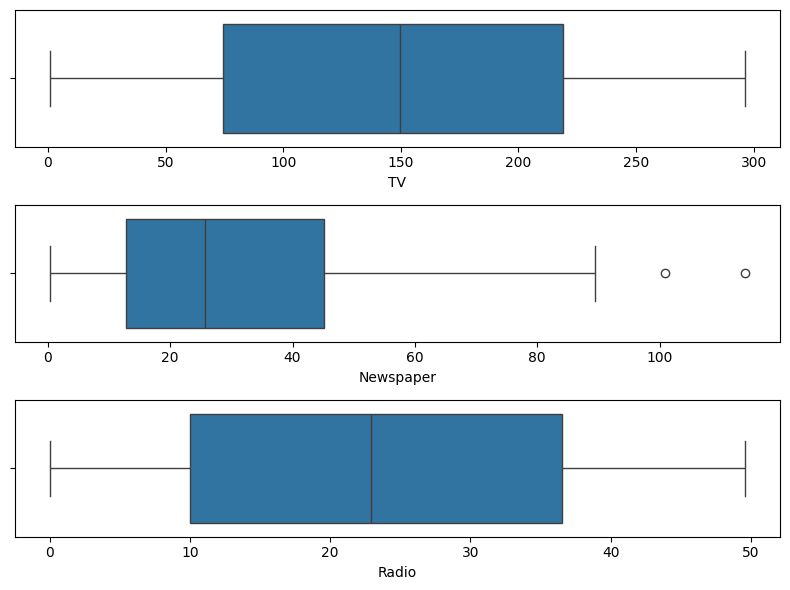

In [116]:
fig, axs = plt.subplots(3, figsize=(8,6))

plt1 = sns.boxplot(x=ds['TV'],ax=axs[0])
plt2 = sns.boxplot(x=ds['Newspaper'],ax=axs[1])
plt3 = sns.boxplot(x=ds['Radio'],ax=axs[2])

axs[0].set_xlabel('TV')
axs[1].set_xlabel('Newspaper')
axs[2].set_xlabel('Radio')

plt.tight_layout()
plt.show

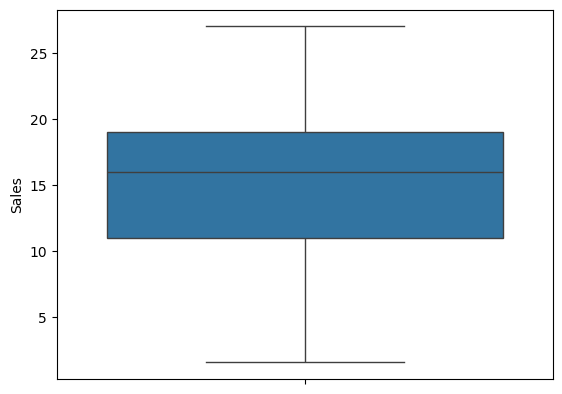

In [117]:
sns.boxplot(ds['Sales'])
plt.show()

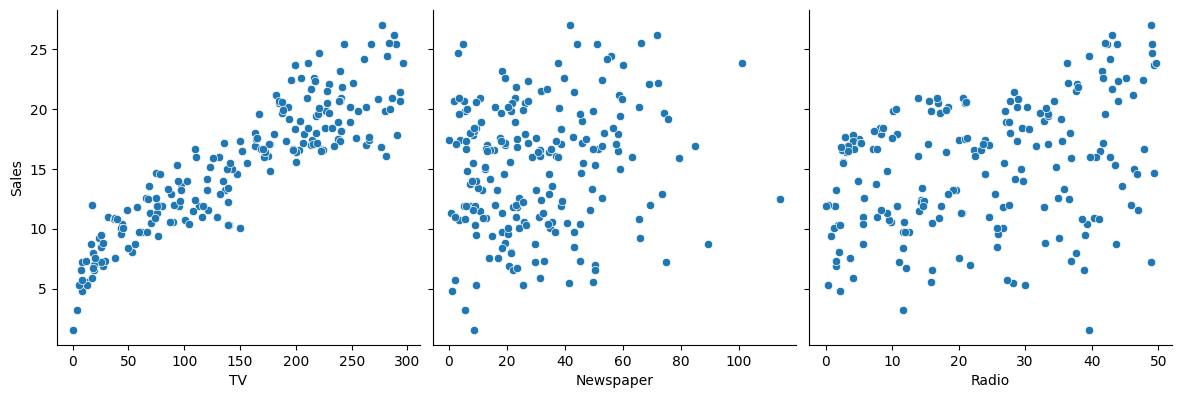

In [118]:
sns.pairplot(ds, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',height=4,aspect = 1, kind='scatter')
plt.show()

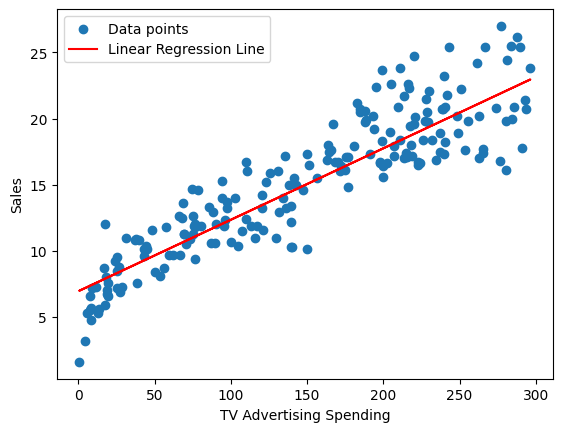

In [119]:
plt.scatter(ds['TV'], ds['Sales'], label='Data points')

intercept = 6.948
slope = 0.054
plt.plot(ds['TV'], intercept + slope * ds['TV'], 'r', label = 'Linear Regression Line')

plt.xlabel('TV Advertising Spending')
plt.ylabel('Sales')
plt.legend()
plt.show()

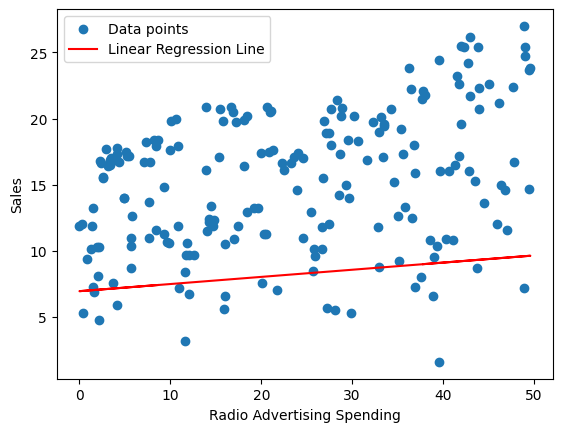

In [120]:
plt.scatter(ds['Radio'],ds['Sales'], label='Data points')

intercept = 6.948
slope = 0.054
plt.plot(ds['Radio'], intercept + slope * ds['Radio'], 'r',label = 'Linear Regression Line')
plt.xlabel('Radio Advertising Spending')
plt.ylabel('Sales')
plt.legend()

plt.show()

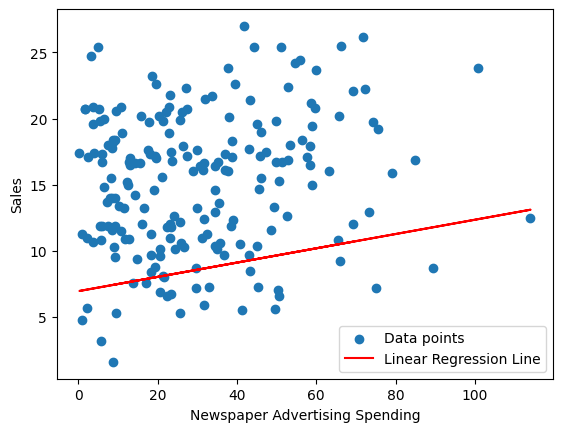

In [121]:
plt.scatter(ds['Newspaper'], ds['Sales'], label='Data points')

intercept = 6.948
slope = 0.054
plt.plot(ds['Newspaper'], intercept + slope * ds['Newspaper'], 'r', label = 'Linear Regression Line')

plt.xlabel('Newspaper Advertising Spending')
plt.ylabel('Sales')
plt.legend()
plt.show()

Thus by checking all 3 parameters of Linear Regression line we se that 'TV' has many datapoints in close connection with the regression line.therefore we will consider 'TV' as our parameter for further analysis.

In [122]:
correlation_matrix = ds[['TV','Newspaper','Radio','Sales']].corr()
print(correlation_matrix)

                 TV  Newspaper     Radio     Sales
TV         1.000000   0.056648  0.054809  0.901208
Newspaper  0.056648   1.000000  0.354104  0.157960
Radio      0.054809   0.354104  1.000000  0.349631
Sales      0.901208   0.157960  0.349631  1.000000


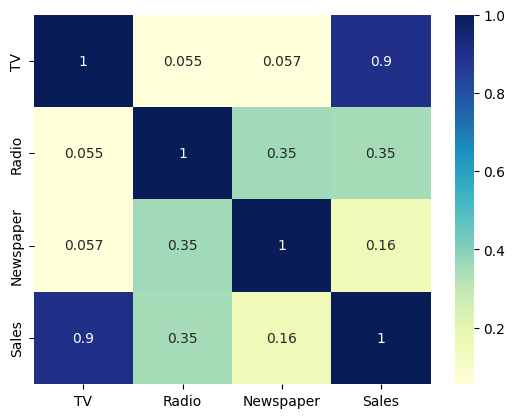

In [123]:
sns.heatmap(ds.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [124]:
X = ds['TV']
y = ds['Sales']

In [125]:
X.info()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: TV
Non-Null Count  Dtype  
--------------  -----  
200 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [126]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
200 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [127]:
X.sample()

142    220.5
Name: TV, dtype: float64

In [128]:
y.sample()

170    8.4
Name: Sales, dtype: float64

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 100)

In [130]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [131]:
X_test.head()

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
Name: TV, dtype: float64

In [132]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [133]:
y_test.head()

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
Name: Sales, dtype: float64

In [134]:
ds = np.array(ds).reshape(1, -1)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

##Random Forest Regression

In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

<ipython-input-135-d8825353ce47>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [136]:
print(X_test.shape)

(60, 1)


In [137]:
y_pred = model.predict(X_test)

y_pred

array([ 5.543     , 18.4241    , 13.801     , 18.805     , 23.257425  ,
       19.364     , 12.486     , 21.809     , 18.877     , 18.877     ,
       12.89758333, 21.459     , 10.638     , 19.065     , 12.79      ,
       14.045     , 12.408     , 17.159     , 17.276     , 15.17476667,
       20.269     , 13.595     , 20.48566667, 15.376     , 20.366     ,
       19.151     , 19.151     , 12.843     , 20.366     , 14.229     ,
       11.933     , 11.417     , 14.548     , 19.025     , 10.835     ,
       12.9315    , 13.171     , 18.827     , 16.949     , 18.841     ,
       20.269     , 15.916     , 17.577     , 18.605     , 12.9315    ,
       12.457     , 10.261     , 20.6       , 11.484     , 10.833     ,
       19.55366667, 16.474     , 13.767     , 13.259     , 22.289     ,
       10.09      , 10.261     ,  8.196     , 21.809     , 12.728     ])

In [138]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error", mse)
print("R-squared:", r2)

Mean Squared Error 5.4081248009595
R-squared: 0.7242632711248863


In [139]:
new_campaign = np.array([180.8, 10.8, 58.4   ]).reshape(-1, 1)
predicted_sales = model.predict(new_campaign)
print("Predicted Sales for the new Campaign:", predicted_sales[0])

Predicted Sales for the new Campaign: 18.189000000000025


In [140]:
new_campaign = np.array([1000, 1, 580.4	]).reshape(-1, 1)
predicted_sales = model.predict(new_campaign)
print("Predicted Sales for the new campaign:", predicted_sales[0])

Predicted Sales for the new campaign: 22.605000000000008


##Linear REgression

In [141]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [142]:
y_pred = model.predict(X_test)
y_pred

array([[ 7.37414007],
       [19.94148154],
       [14.32326899],
       [18.82329361],
       [20.13239168],
       [18.2287449 ],
       [14.54145201],
       [17.72692398],
       [18.75238413],
       [18.77420243],
       [13.34144544],
       [19.46693349],
       [10.01415451],
       [17.1923756 ],
       [11.70507285],
       [12.08689312],
       [15.11418241],
       [16.23237035],
       [15.8669138 ],
       [13.1068987 ],
       [18.65965635],
       [14.00690363],
       [17.60692332],
       [16.60328147],
       [17.03419291],
       [18.96511257],
       [18.93783969],
       [11.05597839],
       [17.03419291],
       [13.66326538],
       [10.6796127 ],
       [10.71234015],
       [13.5487193 ],
       [17.22510305],
       [ 9.67597085],
       [13.52144643],
       [12.25053038],
       [16.13418799],
       [19.07965865],
       [17.48692266],
       [18.69783838],
       [16.53237199],
       [15.92145955],
       [18.86693021],
       [13.5050827 ],
       [11

In [143]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4.077556371826948
R-squared: 0.7921031601245662


In [109]:
new_campaign = np.array([44.5, 39.3, 45.1    ]).reshape(-1,1)
predicted_sales = model.predict(new_campaign)
print("Predicted Sales for the new Campaign", predicted_sales[0])

Predicted Sales for the new Campaign [9.3759692]
Predicted Sales for the new Campaign [9.3759692]
